In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [27]:
from dtaidistance import dtw


**Import Files**

In [30]:
model_output_csv_path = "../../../data/model_output/2024-02-12T10-29+00-00_label/start_2023-06-27T04-09-06.935+00-00.csv"

model_detections = pd.read_csv(model_output_csv_path, delimiter=",")

ground_truth_csv = "../../../data/labels/start_2023-06-27T04-09-06.935+00-00_ground_truth.csv"

ground_truth = pd.read_csv(ground_truth_csv, delimiter=",")

value_counts_model = pd.DataFrame(model_detections.id.value_counts()).reset_index().rename(columns={"index": "id", "id": "occurences"})

value_counts_truth =  pd.DataFrame(ground_truth.id.value_counts()).reset_index().rename(columns={"index": "id", "id": "occurences"})

In [31]:
model_detections.to_csv("wat.csv", index=False)

In [32]:
value_counts_model

,id,occurences
0,4370,1856
1,1700,546
2,8457,406
3,9591,351
4,1656,339
...,...,...
62,3101,34
63,5103,33
64,2729,33
65,8524,33


**PLOT PATHS**

In [33]:
value_counts_model.head(100)

,id,occurences
0,4370,1856
1,1700,546
2,8457,406
3,9591,351
4,1656,339
...,...,...
62,3101,34
63,5103,33
64,2729,33
65,8524,33


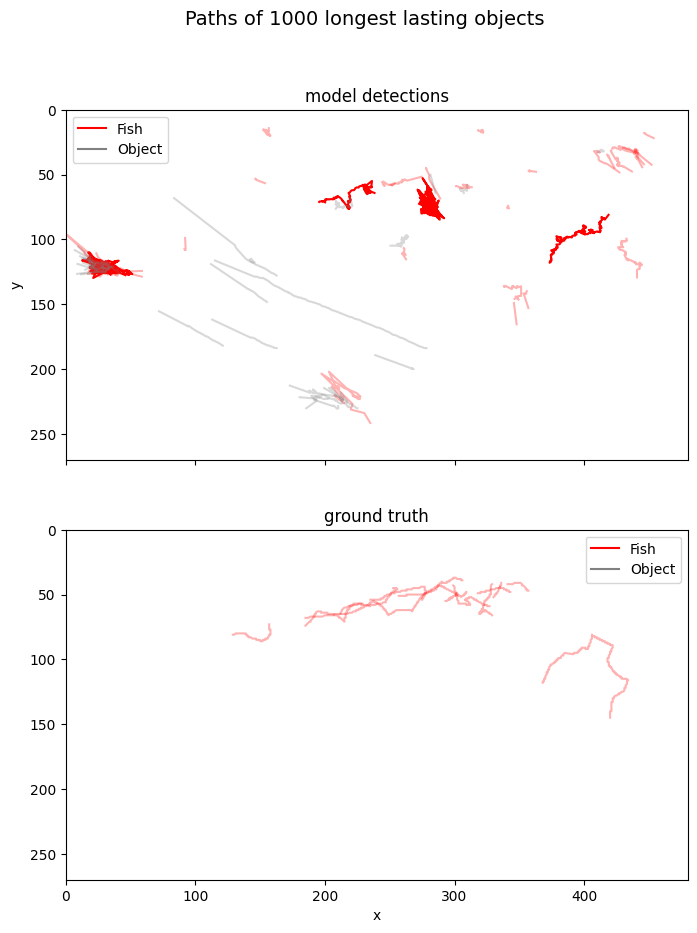

In [85]:
amount = 1000
alpha = 1
fish_color = "red"
object_color = "grey"

fig, [ax, ax1] = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
plt.gca().invert_yaxis()

for object in value_counts_model.id.tolist()[:amount]:
    #if model_detections.loc[model_detections.id == object, "classification"].value_counts().idxmax() == "fish":
    #    color = fish_color
    if object in new_fish:
        color = fish_color
    else:
        color = object_color
        alpha = 0.3
    ax.plot(model_detections.loc[model_detections.id == object, "x"], model_detections.loc[model_detections.id == object, "y"], alpha=alpha, color=color)

for object in value_counts_truth.id.tolist():
    ax1.plot(ground_truth.loc[ground_truth.id == object, "x"], ground_truth.loc[ground_truth.id == object, "y"], alpha=alpha, color=fish_color)

ax.set(ylabel='y',
       title="model detections", ylim=[270, 0], xlim=[0, 480])
ax1.set(xlabel='x', title="ground truth", ylim=[270, 0], xlim=[0, 480])
ax.set_aspect('equal', adjustable='box')
ax1.set_aspect('equal', adjustable='box')
fig.suptitle(f"Paths of {amount} longest lasting objects", fontsize=14)

line1 = ax.plot([],[], color=fish_color, label='Fish')
line2 = ax.plot([],[], color=object_color, label='Object')
ax.legend()
line1 = ax1.plot([],[], color=fish_color, label='Fish')
line2 = ax1.plot([],[], color=object_color, label='Object')
ax1.legend()

plt.show()

In [36]:
def plot_path(identifier, data, alpha, color):
    ylim=[270, 0] 
    xlim=[0, 480]
    plt.plot(data.loc[data.id == identifier, "x"], data.loc[data.id == identifier, "y"], alpha=alpha, color=color)
    plt.xlim(xlim)
    plt.ylim(ylim)

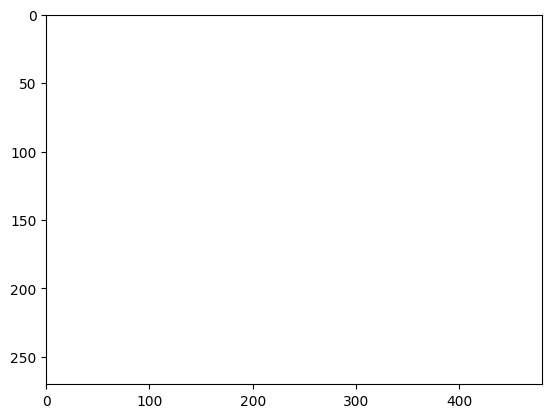

In [37]:
plot_path(13410, model_detections, 0.2, "red")


In [38]:
identifier_counts = model_detections.id.value_counts()

In [39]:
filtered_df = model_detections[model_detections['id'].isin(identifier_counts[identifier_counts >= 20].index)]

In [40]:
filtered_twice = filtered_df
#filtered_twice = filtered_df[filtered_df['id'].isin(identifier_counts[identifier_counts <= 360].index)]

In [41]:
def get_path(identifier, data):
    return data.loc[data.id == identifier, ["x", "y"]].to_numpy()

paths = []
paths_identifiers = []

for identifier in filtered_twice["id"].unique():
    path = get_path(identifier, filtered_df)
    paths.append(path)
    paths_identifiers.append(identifier)


In [42]:
paths_identifiers

[140,
 272,
 397,
 1360,
 1563,
 1656,
 1700,
 2058,
 2246,
 2256,
 2322,
 2379,
 2416,
 2572,
 2574,
 2729,
 2962,
 3101,
 3319,
 3556,
 3762,
 3817,
 3985,
 4188,
 4370,
 4487,
 4818,
 4843,
 4941,
 4970,
 5103,
 5633,
 5854,
 5903,
 6074,
 6301,
 6309,
 6582,
 7107,
 7307,
 7444,
 7750,
 7752,
 7793,
 7866,
 7969,
 7974,
 8033,
 8041,
 8048,
 8087,
 8296,
 8457,
 8524,
 8527,
 8622,
 8774,
 8932,
 8937,
 9325,
 9591,
 10174,
 10290,
 10342,
 10499,
 10656,
 10708]

In [43]:
def z_standardize(path):
    mean = np.mean(path, axis=0)
    std = np.std(path, axis=0)
    return (path - mean) / std

In [44]:
standardized_paths = [z_standardize(path) for path in paths]

In [45]:
from dtaidistance import dtw_ndim

from dtaidistance import dtw, clustering


In [46]:
hier = clustering.Hierarchical(dtw_ndim.distance_matrix, dists_options={"window": 40})

In [47]:
hier_tree = clustering.HierarchicalTree(hier)

In [48]:
fitting_result = hier_tree.fit(standardized_paths)

In [49]:
fitting_result

{0: {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66}}

In [50]:
hier_tree.linkage

[(43, 13, 0.4050658756156382, 0),
 (61, 25, 0.4606086385698827, 0),
 (68, 0, 0.4892899635479532, 0),
 (49, 40, 0.5021046848652428, 0),
 (67, 69, 0.585701951271805, 0),
 (35, 71, 0.6428266186172957, 0),
 (45, 70, 0.7007754370333996, 0),
 (48, 72, 0.7660513962407614, 0),
 (51, 36, 0.87038953998603, 0),
 (53, 74, 0.9140179109636232, 0),
 (75, 17, 0.9766888979259734, 0),
 (73, 77, 0.9835831129188941, 0),
 (21, 76, 1.163005543037717, 0),
 (3, 79, 1.4884233170986993, 0),
 (30, 80, 1.6301678684677439, 0),
 (46, 42, 1.926520482340715, 0),
 (19, 81, 2.226175950651055, 0),
 (34, 18, 2.3096443298532163, 0),
 (84, 78, 2.4315487665208835, 0),
 (63, 85, 2.8692031445948034, 0),
 (82, 83, 3.108643938099764, 0),
 (26, 86, 3.397410152040661, 0),
 (44, 15, 3.4782441958715022, 0),
 (58, 88, 3.6069803991119813, 0),
 (90, 16, 3.6208837260942945, 0),
 (10, 7, 3.6759473943809873, 0),
 (65, 87, 4.3742434743766045, 0),
 (20, 93, 4.668498373960667, 0),
 (59, 50, 4.817065826286193, 0),
 (57, 32, 5.024872685184867

In [52]:
from scipy.cluster.hierarchy import dendrogram

In [79]:
len(paths)

67

In [78]:
hier_tree.linkage

[(43, 13, 0.4050658756156382, 0),
 (61, 25, 0.4606086385698827, 0),
 (68, 0, 0.4892899635479532, 0),
 (49, 40, 0.5021046848652428, 0),
 (67, 69, 0.585701951271805, 0),
 (35, 71, 0.6428266186172957, 0),
 (45, 70, 0.7007754370333996, 0),
 (48, 72, 0.7660513962407614, 0),
 (51, 36, 0.87038953998603, 0),
 (53, 74, 0.9140179109636232, 0),
 (75, 17, 0.9766888979259734, 0),
 (73, 77, 0.9835831129188941, 0),
 (21, 76, 1.163005543037717, 0),
 (3, 79, 1.4884233170986993, 0),
 (30, 80, 1.6301678684677439, 0),
 (46, 42, 1.926520482340715, 0),
 (19, 81, 2.226175950651055, 0),
 (34, 18, 2.3096443298532163, 0),
 (84, 78, 2.4315487665208835, 0),
 (63, 85, 2.8692031445948034, 0),
 (82, 83, 3.108643938099764, 0),
 (26, 86, 3.397410152040661, 0),
 (44, 15, 3.4782441958715022, 0),
 (58, 88, 3.6069803991119813, 0),
 (90, 16, 3.6208837260942945, 0),
 (10, 7, 3.6759473943809873, 0),
 (65, 87, 4.3742434743766045, 0),
 (20, 93, 4.668498373960667, 0),
 (59, 50, 4.817065826286193, 0),
 (57, 32, 5.024872685184867

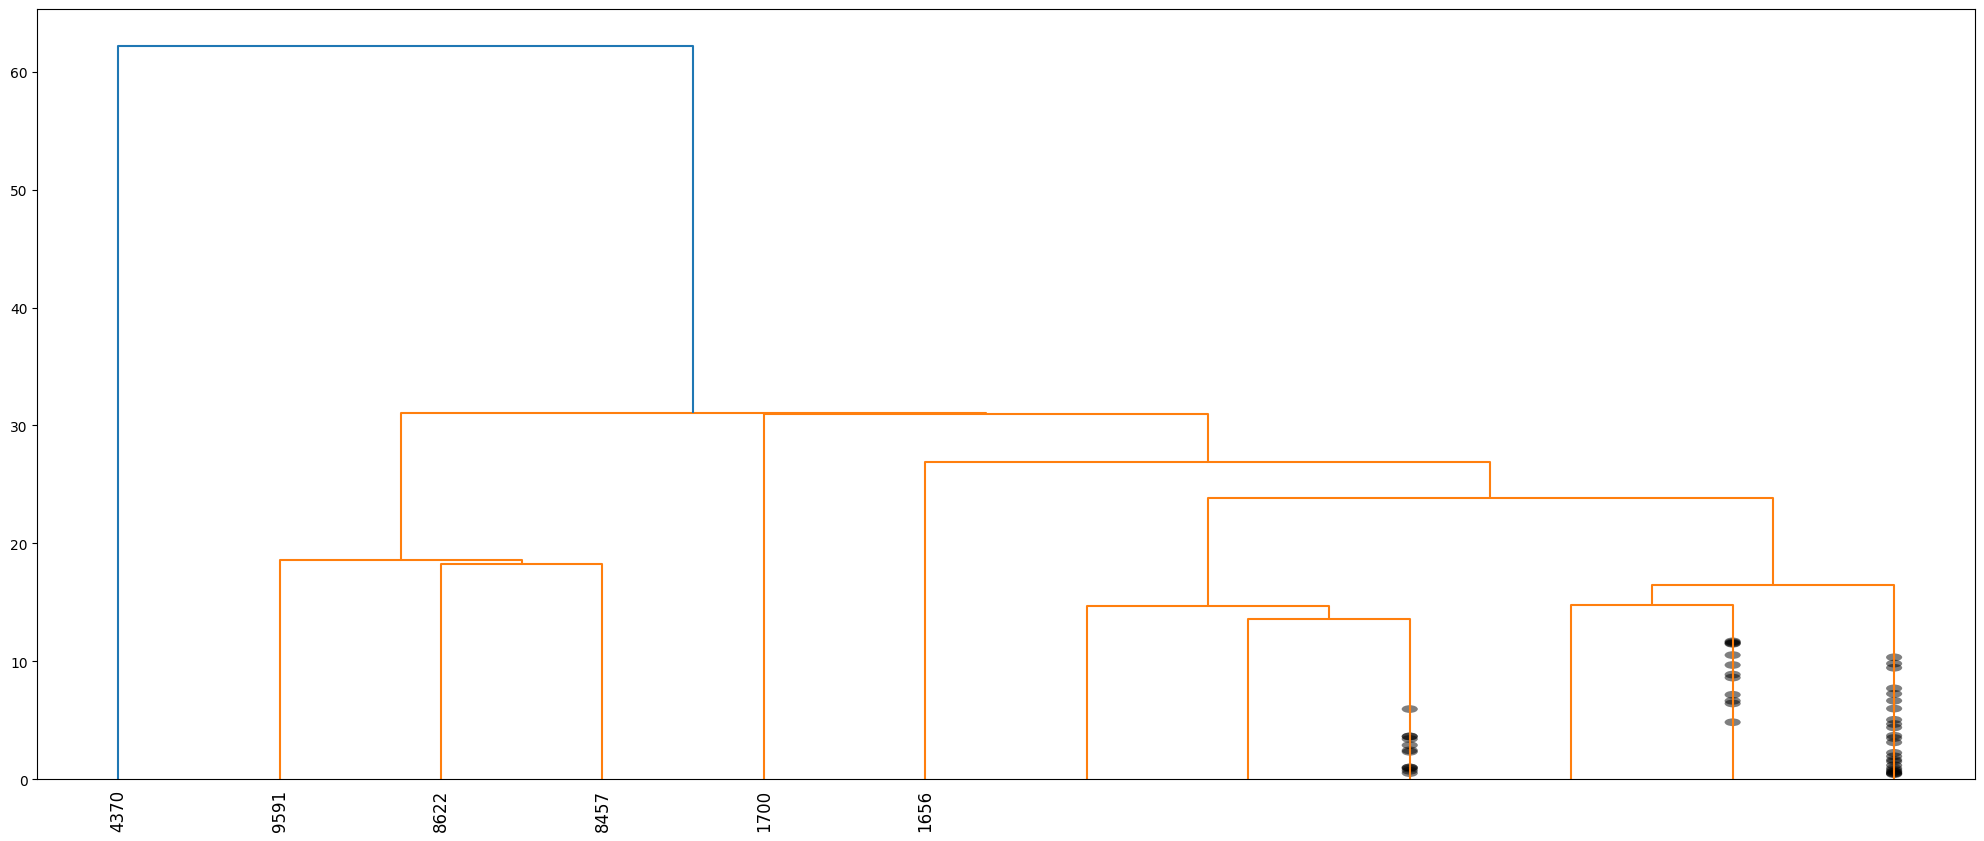

In [53]:
plt.figure(figsize=(25, 10))

dendrogram(hier_tree.linkage, labels=filtered_twice["id"].unique(), truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, )
plt.savefig('wat.png')


In [54]:
wat = clustering.KMeans(k=2).fit(standardized_paths)

{}
26.8538609763895


In [69]:
wat

({0: {0,
   3,
   4,
   13,
   19,
   20,
   21,
   23,
   25,
   27,
   28,
   29,
   30,
   32,
   33,
   35,
   39,
   41,
   42,
   43,
   46,
   48,
   50,
   53,
   57,
   59,
   61,
   64,
   65},
  1: {1,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   14,
   15,
   16,
   17,
   18,
   22,
   24,
   26,
   31,
   34,
   36,
   37,
   38,
   40,
   44,
   45,
   47,
   49,
   51,
   52,
   54,
   55,
   56,
   58,
   60,
   62,
   63,
   66}},
 8)

In [56]:
medoids = clustering.KMedoids(dtw_ndim.distance_matrix, dists_options={"window": 40}, k=2)

In [57]:
med_result = medoids.fit(standardized_paths)

In [58]:
med_result

{40: {1,
  2,
  9,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  22,
  23,
  24,
  26,
  31,
  34,
  36,
  37,
  38,
  39,
  40,
  44,
  45,
  47,
  49,
  51,
  52,
  54,
  55,
  56,
  58,
  59,
  60,
  62,
  63,
  66},
 53: {0,
  3,
  4,
  5,
  6,
  7,
  8,
  10,
  13,
  19,
  20,
  21,
  25,
  27,
  28,
  29,
  30,
  32,
  33,
  35,
  41,
  42,
  43,
  46,
  48,
  50,
  53,
  57,
  61,
  64,
  65}}

In [59]:
med_result.keys()

dict_keys([40, 53])

{0: {0,
  3,
  4,
  13,
  19,
  20,
  21,
  23,
  25,
  27,
  28,
  29,
  30,
  32,
  33,
  35,
  39,
  41,
  42,
  43,
  46,
  48,
  50,
  53,
  57,
  59,
  61,
  64,
  65},
 1: {1,
  2,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  22,
  24,
  26,
  31,
  34,
  36,
  37,
  38,
  40,
  44,
  45,
  47,
  49,
  51,
  52,
  54,
  55,
  56,
  58,
  60,
  62,
  63,
  66}}

In [82]:
new_fish = []
clusters = wat[0]
for i, identifier in enumerate(paths_identifiers):
    if i in clusters.get(1, []):
        new_fish.append(identifier)

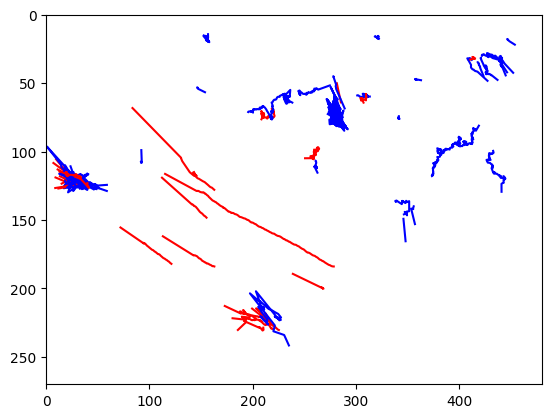

In [76]:
clusters = med_result
clusters = wat[0]
for i in range(0, len(paths)):
    if i in clusters.get(0):
        color = "red"
    if i in clusters.get(1):
        color = "blue"
    #if i in clusters.get(0, []):
    #    color = "red"
    #if i in clusters.get(1, []):
    #    color = "blue"
    #if i in clusters.get(2, []):
    #    color = "green"
    #if i in clusters.get(3, []):
    #    color = "yellow"
    plot_path_numpy(paths[i], 1, color)

In [62]:
plot_path_numpy(paths[74], 1, "yellow")

NameError: name 'plot_path_numpy' is not defined

In [63]:
def plot_path_numpy(data, alpha, color):
    ylim=[270, 0] 
    xlim=[0, 480]
    plt.plot(data[:,0], data[:,1], alpha=alpha, color=color)
    plt.xlim(xlim)
    plt.ylim(ylim)

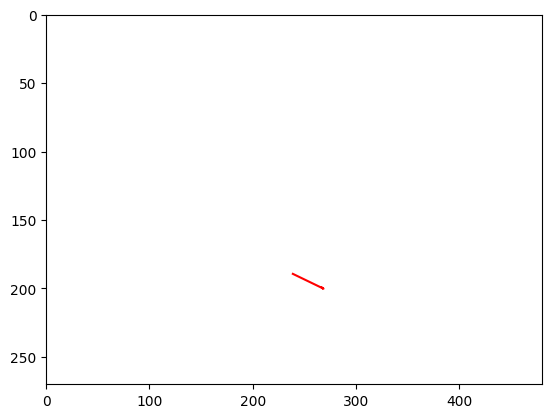

In [68]:
plot_path_numpy(paths[53], 1, "red")

In [ ]:
plot_path_numpy(paths[14], 0.2, "blue")

In [ ]:
standardized_paths[14]

In [ ]:
plt.plot(standardized_paths[14][:,0], standardized_paths[14][:,1], alpha=1, color=fish_color)


In [ ]:
plt.plot(standardized_paths[15][:,0], standardized_paths[15][:,1], alpha=1, color=fish_color)


In [ ]:
plt.plot(ground_truth["x"], ground_truth["y"], alpha=alpha, color=fish_color)


In [ ]:
len(paths)

In [ ]:
get_path(13410, model_detections)

In [ ]:
path = model_detections[model_detections['id']==13410][["x", "y"]].to_numpy()

In [ ]:
another_path = model_detections[model_detections['id']==14868][["x", "y"]].to_numpy()


In [ ]:
another_path.shape

In [ ]:
dtw_ndim.distance(path, another_path)

In [ ]:
dtw_ndim.distance(path, path)


In [ ]:
path.shape

In [ ]:
import numpy as np

In [ ]:
series1 = np.array([[0, 0],  # first point at t=0
                    [0, 1],  # second point at t=1
                    [2, 1],
                    [0, 1],
                    [0, 0]], dtype=np.double)


## Tested until here with new code

In [ ]:
few_fish_night_csv = "v2_output_02-23.csv"
many_fish_afternoon_csv = "v2_output_16-46.csv"
few_fish = pd.read_csv(few_fish_night_csv, delimiter=",")
many_fish = pd.read_csv(many_fish_afternoon_csv, delimiter=",")

value_counts_few = pd.DataFrame(few_fish.ID.value_counts()).reset_index().rename(columns={"index": "ID", "ID": "occurences"})
value_counts_many = pd.DataFrame(many_fish.ID.value_counts()).reset_index().rename(columns={"index": "ID", "ID": "occurences"})

In [ ]:
# value_counts_few.plot.bar(x='ID', y='occurences')
value_counts_few.head(200)

In [ ]:
amount = 100
alpha = 0.3
fish_color = "red"
object_color = "grey"

fig, [ax, ax1] = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
plt.gca().invert_yaxis()

data = few_fish
for object in value_counts_few.ID.tolist()[:amount]:
    color = object_color
    ax.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)

data = many_fish
for object in value_counts_many.ID.tolist()[:amount]:
    color = object_color
    ax1.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)


ax.set(ylabel='y',
       title="no fish \n" + few_fish_night_csv, ylim=[270, 0], xlim=[0, 480])
ax1.set(xlabel='x', title="many fish \n" + many_fish_afternoon_csv, ylim=[270, 0], xlim=[0, 480])
ax.set_aspect('equal', adjustable='box')
ax1.set_aspect('equal', adjustable='box')
fig.suptitle(f"Paths of {amount} longest lasting objects", fontsize=14)

line1 = ax.plot([],[], color=fish_color, label='Fish')
line2 = ax.plot([],[], color=object_color, label='Object')
ax.legend()
line1 = ax1.plot([],[], color=fish_color, label='Fish')
line2 = ax1.plot([],[], color=object_color, label='Object')
ax1.legend()

plt.show()

In [ ]:
many_fish_min_50 = many_fish.loc[many_fish.ID.isin(value_counts_many.loc[value_counts_many["occurences"]>50, "ID"])]

In [ ]:
many_fish_min_50.groupby("ID").apply(lambda x: np.polyfit(x.x, x.y, deg=1)[0]).reset_index().sort_values(0).plot.hist(x="ID", y=0, bins=50)

In [ ]:
few_fish_min_50 = few_fish.loc[few_fish.ID.isin(value_counts_few.loc[value_counts_few["occurences"]>50, "ID"])]

In [ ]:
few_fish_min_50.groupby("ID").apply(lambda x: np.polyfit(x.x, x.y, deg=1)[0]).reset_index().sort_values(0).plot.hist(x="ID", y=0, bins=30)